# Спрос на рейсы авиакомпании

### Описание проекта
Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки.  
Важно понять предпочтения пользователей, покупающих билеты на разные направления.  
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.  


### Описание данных

1. */datasets/query_1.csv* — результат первого запроса.   

    В нём содержится информация о:  
        model — модели самолета  
        flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года  

2. */datasets/query_3.csv* — результат третьего запроса.   

    В нём содержится информация о:  
        city — городах  
        average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года  

3. */datasets/query_last.csv* — результат последнего запроса.   

    В нём следующая информация:  
        week_number — номер недели;  
        ticket_amount — количество проданных билетов за неделю;  
        festival_week — есть ли на этой неделе фестиваль;  
        festival_name — название фестиваля.

#### [Часть 1. Аналитика средствами Python](#part1)
* [1. Импорт библиотек.](#part1.1)
* [2. Загрузка и изучение данных.](#part1.2)
* [3. Анализ данных](#part1.3)


#### [Часть 2. Проверка гипотезы средствами Python](#part2)
* [1. Определения критерия.](#part2.1)
* [2. Проверка гиоптезы.](#part2.2)

#### [Общий вывод](#part3)

<a id='part1'></a>
# 1. Аналитика средствами Python
<a id='part1.1'></a>
## 1.1 Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

<a id='part1.2'></a>
## 1.2 Загрузка и изучение данных

Загрузим датасеты.

In [2]:
#data1 = pd.read_csv('datasets\query_1.csv')
#data2 = pd.read_csv('datasets\query_3.csv')
#data3 = pd.read_csv('datasets\query_last.csv')

try:
    data1 = pd.read_csv('datasets\query_1.csv')
    data2 = pd.read_csv('datasets\query_3.csv')
    data3 = pd.read_csv('datasets\query_last.csv')
except:
    data1 = pd.read_csv('/datasets/query_1.csv')
    data2 = pd.read_csv('/datasets/query_3.csv')
    data3 = pd.read_csv('/datasets/query_last.csv')

Для каждого из загруженных датасетов вызовем 

In [3]:
for df in [data1,data2,data3]:
    df.info()
    display(df)
    print('-------------------------------------------------------\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


-------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


-------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


-------------------------------------------------------




В первых двух датасетах данные полные, предобработка не нужна.   

Третий датасет используется для проверки гипотезы «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».   
Для проверки этой гипотезы столбец *festival_name* с наименованием фестиваля не нужен (можно удалить), а столбец *festival_week* можно преобразовать, заменив значения NaN на нули, а не NaN на единицы.

In [4]:
data3 = data3.drop('festival_name', axis=1).fillna(0).astype(int)
data3.rename(columns={'festival_week':'is_festival'}, inplace=True)
data3.loc[data3['is_festival'] > 0, 'is_festival'] = 1
data3.info()
data3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
is_festival      10 non-null int64
dtypes: int64(3)
memory usage: 368.0 bytes


,week_number,ticket_amount,is_festival
0,30,43568,1
1,31,51034,1
2,32,51675,0
3,33,51378,0
4,34,51492,0


<a id='part1.3'></a>
## 1.3 Анализ данных

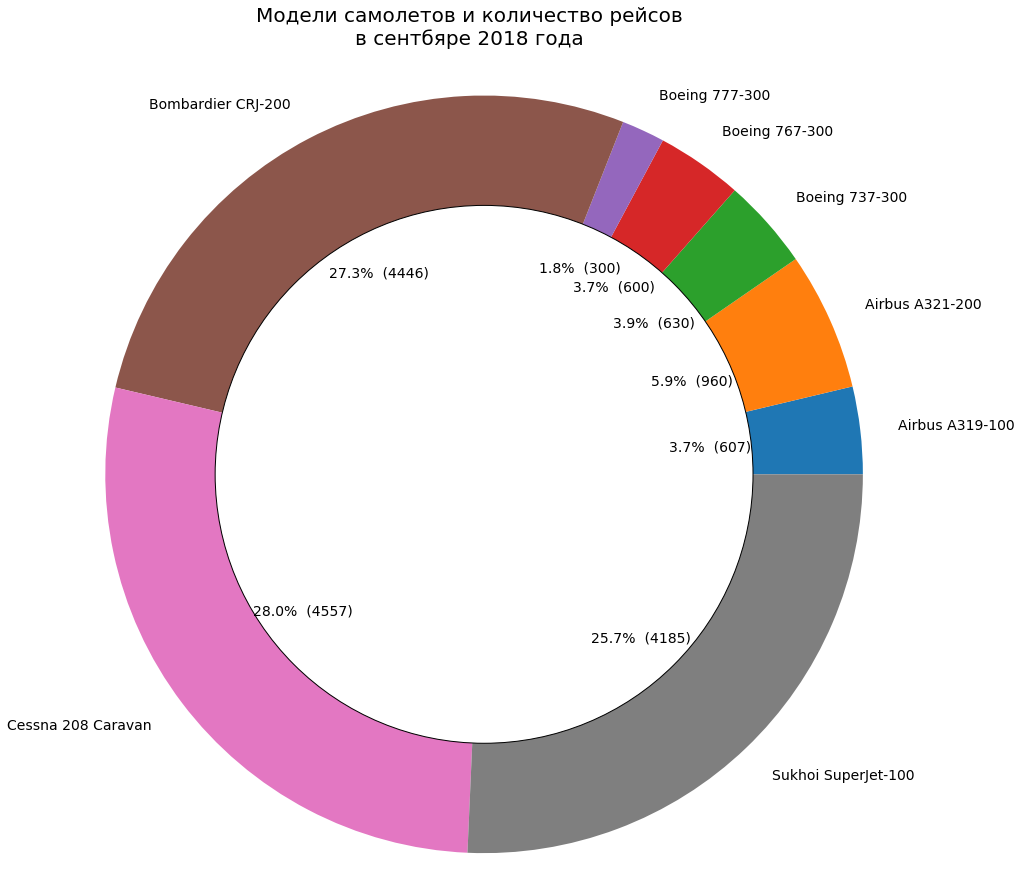

In [5]:
# для отображения и процентов и реального значения
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
#данные
labels = data1.model
sizes = data1.flights_amount

#строим график
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(sizes,labels=labels,autopct=make_autopct(sizes), textprops={'fontsize': 14})

#бублик
centre_circle = plt.Circle((0,0),0.71,color='black', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.figtext(.5,.9,'Модели самолетов и количество рейсов\nв сентбяре 2018 года', fontsize=20, ha='center')
plt.show()

81% рейсов равномерно разделены между самолетами Bombardier CRJ-200 (50-местный региональный самолет), Sukhoi SuperJet-100 (100-местный среднемагистральный самолет) и Cessna 208 Caravan(10-местный самолет для коротких перелетов).  

Остальные 19% рейсов - это рейсы на самолетах компаний Airbus и Boeing. Причем самолетами для дальних перелетов являются только самолеты Boeing 777-300 и Boeing 767-300.   
То есть почти 95% рейсов, совершенных в сентябре 2018 года - это рейсы на средние и короткие дистанции.



In [6]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

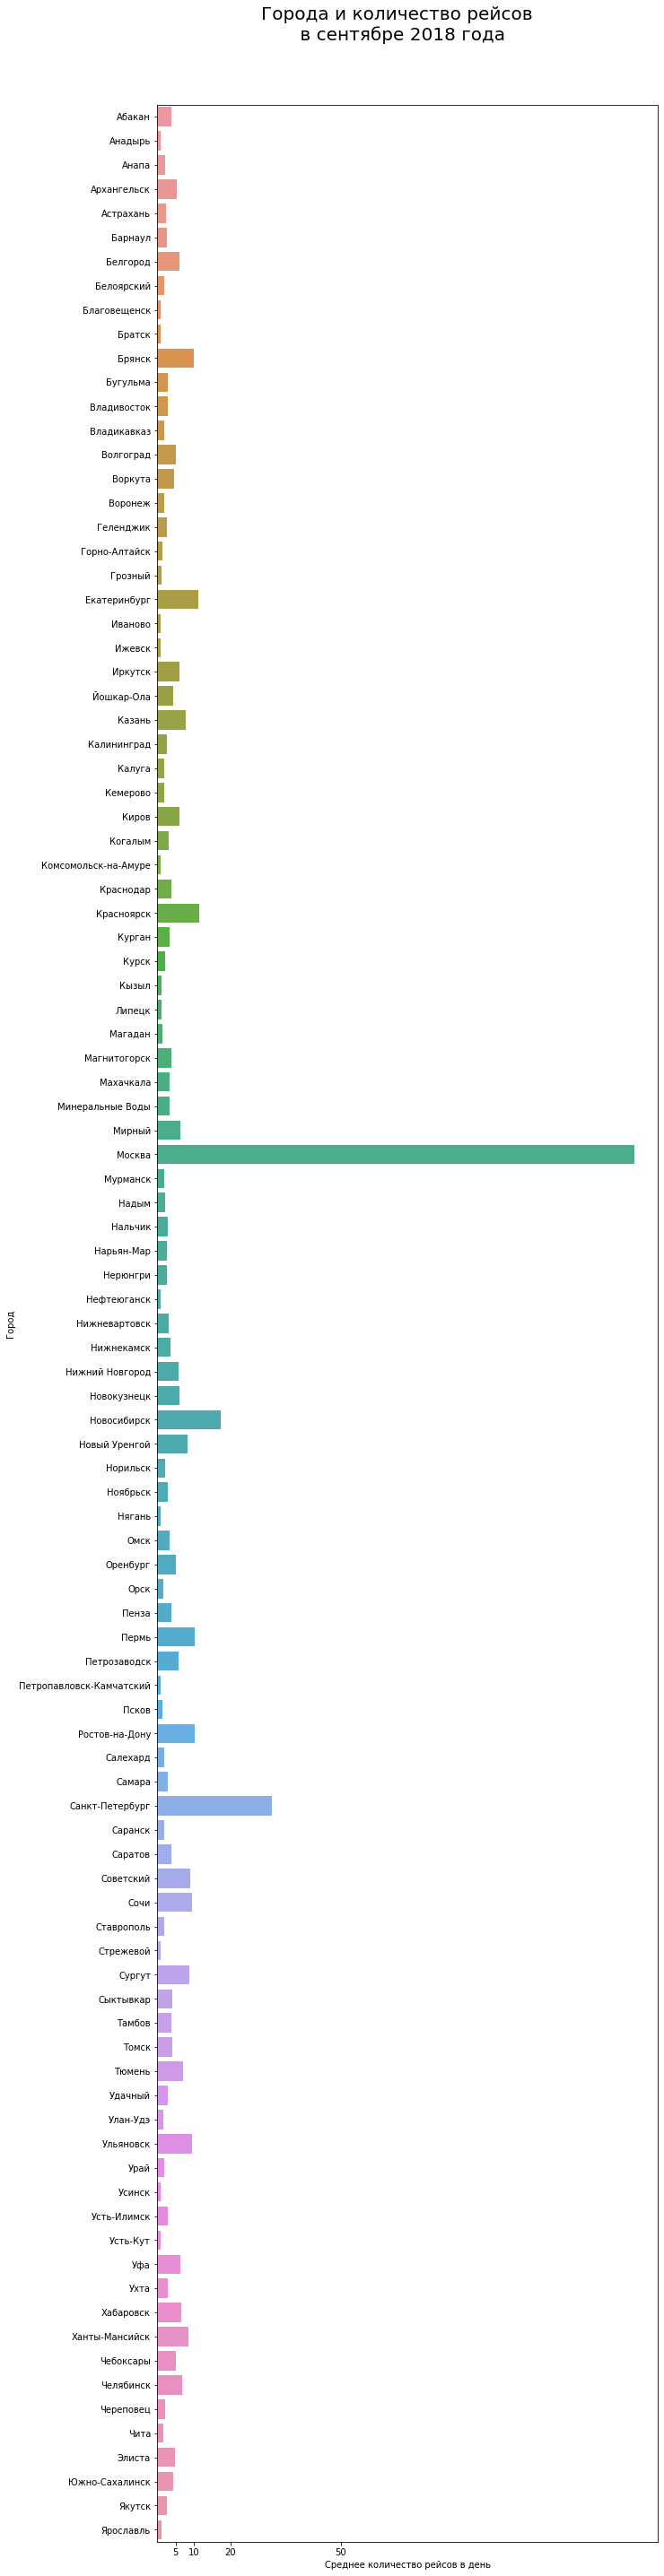

In [7]:
fig1, ax1 = plt.subplots(figsize=(10,50))
sns.barplot(x="average_flights", y="city", data=data2)
# sns.set_theme() 
plt.xlabel('Среднее количество рейсов в день')
plt.ylabel('Город')
plt.figtext(.5,.9,'Города и количество рейсов \n в сентябре 2018 года', fontsize=20, ha='center')
plt.xticks([5,10,20,50])
plt.show()

В Москве в сентбяре 2018 года в день совершалось в разы больше рейсов, чем в других городах. 
В подавляющем большинстве городов в день совершалось от 1 до 10 рейсов.

In [8]:
print('Топ-10 городов по количеству рейсов')
data2.sort_values(by='average_flights',ascending=False).head(10)

Топ-10 городов по количеству рейсов


,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


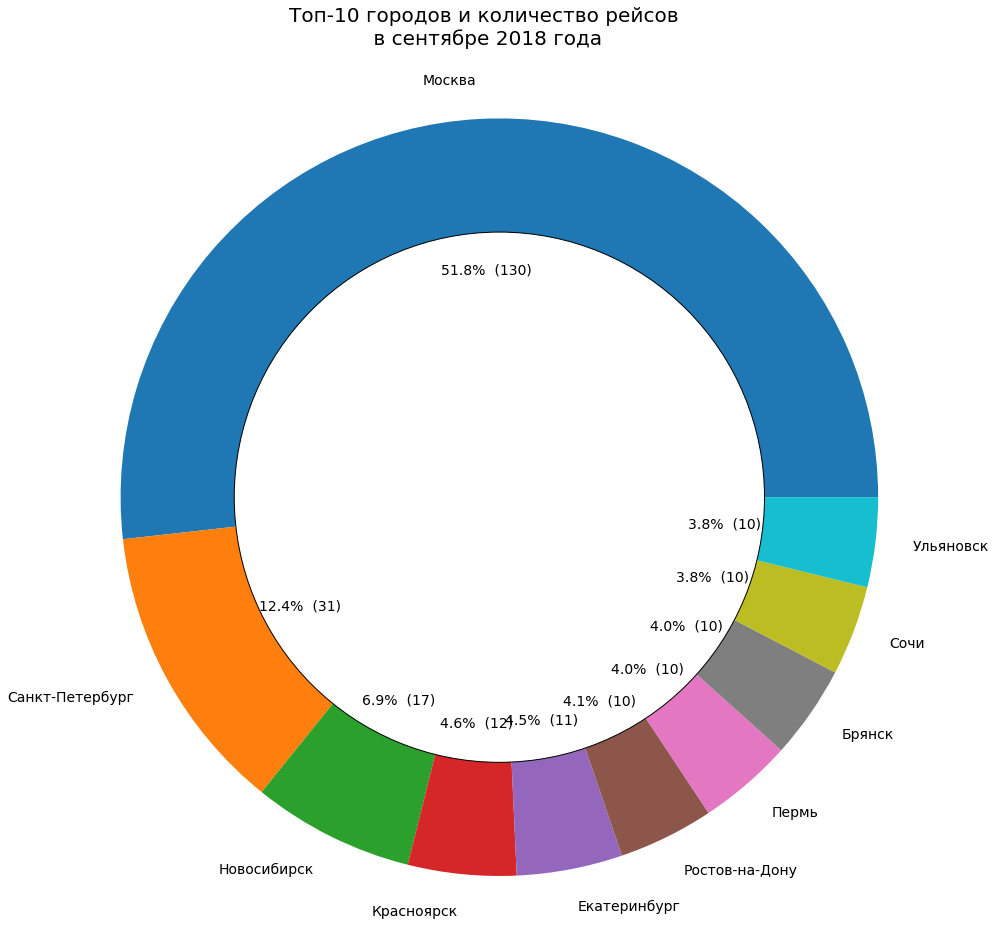

In [9]:
# данные
labels = data2.sort_values(by='average_flights',ascending=False)['city'].head(10)
sizes = data2.sort_values(by='average_flights',ascending=False)['average_flights'].head(10)
# строим график
fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes), textprops={'fontsize': 14})
ax1.axis('equal')

#бублик
centre_circle = plt.Circle((0,0),0.70,color='black', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.figtext(.5,.9,'Топ-10 городов и количество рейсов\n в сентябре 2018 года\n', fontsize=20, ha='center')
plt.show()

Если выделить топ-10 городов с наибольшим количеством рейсов в день, то становится видно, что в Москве совершалось приблизительно столько же рейсов, сколько в последующих 9 городах (около 130 рейсов в день).

На первых трех местах по количеству перелетов находятся три самых крупных города России (Москва, Санкт-Петурбург, Новосибирск).

В остальных 7 городах совершалось приблизмтельно одинаковое количество рейсов в день (около 10). 

## Вывод

Данные загружены, и предобработаны.  
Удалены лишние столбцы и изменен тип данных.  
Проанализировано количество совершенных рейсов в зависимости от модели самолета и города.

<a id='part2'></a>
# 2. Проверка гипотезы средствами Python
<a id='part2.1'></a>
## 2.1 Определения критерия.

Для определения критерия необходимо проверить два исследуемых распределения на нормальность.
Построим QQ-plot и воспользуемся критерием Шапиро-Уилка.

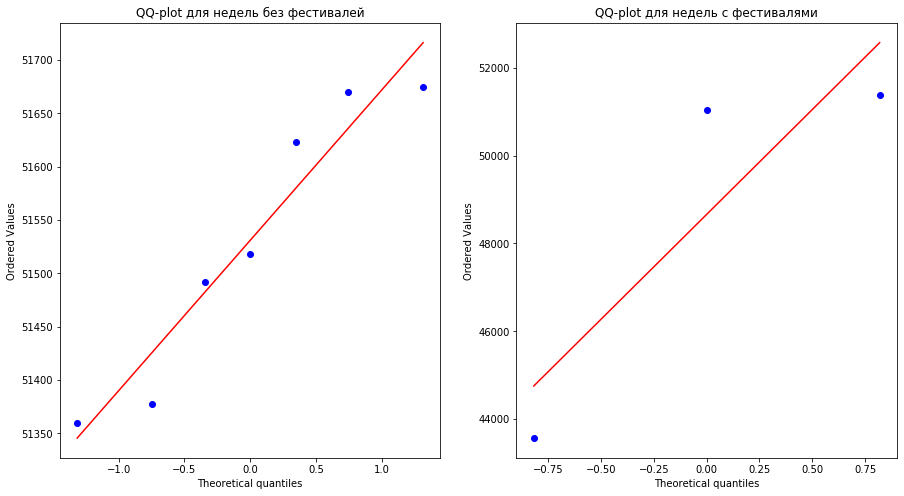

In [10]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
st.probplot(data3.loc[data3['is_festival'] == 0, 'ticket_amount'], plot=ax[0])
st.probplot(data3.loc[data3['is_festival'] == 1, 'ticket_amount'], plot=ax[1])
ax[0].set_title('QQ-plot для недель без фестивалей')
ax[1].set_title('QQ-plot для недель с фестивалями')
plt.show()

In [11]:
print('P-value теста Шапиро-Уилка для недель без фестивалей:',
      st.shapiro(data3.loc[data3['is_festival'] == 0, 'ticket_amount'])[1])
print('P-value теста Шапиро-Уилка для недель с фестивалями:',
      st.shapiro(data3.loc[data3['is_festival'] == 1, 'ticket_amount'])[1])

P-value теста Шапиро-Уилка для недель без фестивалей: 0.29630061984062195
P-value теста Шапиро-Уилка для недель с фестивалями: 0.07614270597696304


Судя по графику QQ-plot, выборка с неделями без фестивалей распределена практически нормально. Тоже самое показывает критерий Шапиро-Уилка (p-value = 0.29).

Однако выборка с неделями, на которых проходили фестивали слишком мала, поэтому хоть и по графику QQ-plot распределение напоминает нормальное, критерий Шапиро-Уилка показывает значение p-value, равное 0.07.

Хоть для обоих распределений значение p-value больше 0.05, оно все равно слишком мало.

В связи с вышесказанным для проверки равенства средних двух выборок будем использовать непараметрический критерий Манна-Уитни.


<a id='part2.2'></a>
## 2.2 Проверка гипотезы

Гипотеза для проверки:
«Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

То есть на нужно проверить гипотезу о равенстве средних двух выборок.

##### Сформулируем нулевую и альтернативную гипотезы.  

H<sub>0</sub>: Средние количества билетов, купленных в неделю, когда проходит какой-то фестиваль и когда фестивали не проходят равны.

H<sub>1</sub>: Средние количества билетов, купленных в неделю, когда проходит какой-то фестиваль и когда фестивали не проходят не равны.

Установим пороговое значение в 1%.

In [12]:
alpha=.01

result = st.mannwhitneyu(data3.loc[data3['is_festival'] == 1, 'ticket_amount'],
data3.loc[data3['is_festival'] == 0, 'ticket_amount'])


print('p-значение: ', result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.03412374418900064
Не получилось отвергнуть нулевую гипотезу


## Вывод

Изучаемые выборки нельзя считать нормально распределеннымы, поэтому сформулированные гипотезы проверяли непараметрическим критерием Манна-Уитни.  
Нулевую гипотезу отвергнуть не удалось, следовательно различия не являются статистически достоверными и носят случайный характер. 

<a id='part3'></a>
# Общий вывод

В процессе работы были извлечены и подготовлены данные из базы данных об авиаперевозках.  
Данные были выгружены в три датасета, в дальнейшем использованные для анализа данных и проверки гипотезы.

Проанализировано количество совершенных рейсов в зависимости от модели самолета и города.

Была проверена гипотеза: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Нулевую гипотезу H<sub>0</sub>: "Средние количества билетов, купленных в неделю, когда проходит какой-то фестиваль и когда фестивали не проходят равны" не удалось отвергнуть по непараметрическому критерию Манна-Уитни.